In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/odia-news-dataset/valid.csv
/kaggle/input/odia-news-dataset/train.csv


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
train = pd.read_csv('/kaggle/input/odia-news-dataset/train.csv')
test = pd.read_csv('/kaggle/input/odia-news-dataset/valid.csv')
train.label.unique()

array(['business', 'entertainment', 'sports'], dtype=object)

In [5]:
train.head()

,headings,label
0,ଅବସର ପାଇଁ ଚିନ୍ତା ନାହିଁ: ମାତ୍ର ୩୩% ଲୋକ କରୁଛନ୍ତ...,business
1,‘ପଦ୍ମାବତ୍‌’ ରିଲିଜ୍‌ ଉପରେ କଟକଣା ଜାରି କଲା ହରିଆଣା…,entertainment
2,ହାମିଲଟନ୍‌ ଟେଷ୍ଟରେ େଓ୍ଵଷ୍ଟଇଣ୍ଡିଜ୍‌ ୨୪୦ ରନ୍‌ରେ ...,sports
3,ଏହି ବଲିଉଡ୍‌ ଅଭିନେତ୍ରୀଙ୍କ ନାଁରେ ରଖାଗଲା ଗଣ୍ଡାର ...,entertainment
4,"ଗିଲ୍‌କ୍ରିଷ୍ଟ, ବାଉଚର ଓ ସାଙ୍ଗାକାରାଙ୍କ ପରେ ଚତୁର୍...",sports


In [6]:
test.head()

,headings,label
0,ପୂର୍ବାଞ୍ଚଳ ହ୍ୟାଣ୍ଡ୍‌ବଲ୍‌: ଓଡ଼ିଶାକୁ କାଂସ୍ୟ,sports
1,"ବସ୍‌, ଟ୍ରେନ୍‌ ଗନ୍ତବ୍ୟ ସ୍ଥଳର ଆଗୁଆ ସୂଚନା ଦେବ ଗୁ...",business
2,"ରିଭର୍ସ ଗିୟରରେ ଚାଲିବ ସ୍କୁଟର, ୨ ଘଂଟା ଚାର୍ଜ କଲେ ...",business
3,ବେଲଜିୟମ ଓ କାନାଡା ଦଳରେ ପରିବର୍ତନ,sports
4,ରୋନାଲ୍‌ଡୋଙ୍କୁ ପଞ୍ଚମ ଥର ବାଲନ୍‌ ଡି’ଓର୍‌ ସମ୍ମାନ,sports


In [7]:
print(train.shape)
print(test.shape)

(15200, 2)
(3801, 2)


#### We will use the train.csv file to generate train_validation split to train and validate our model. We will use the valid.csv to test our model, predicting the label and comparing it with the available ground truth.

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D,MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku

### Tokenize the words in the training set 

In [9]:
tokenizer = Tokenizer()
# entire training set sentences to be put as corpus
corpus = train.headings.values

print("Total sentences = ",len(corpus))
print(corpus[2])
print(corpus[1])

Total sentences =  15200
 ହାମିଲଟନ୍‌ ଟେଷ୍ଟରେ େଓ୍ଵଷ୍ଟଇଣ୍ଡିଜ୍‌ ୨୪୦ ରନ୍‌ରେ ପରାସ୍ତ 
 ‘ପଦ୍ମାବତ୍‌’ ରିଲିଜ୍‌ ଉପରେ କଟକଣା ଜାରି କଲା ହରିଆଣା… 


In [10]:
#Tokenizing the texts
#corpus = [item for sublist in corpus for item in sublist]
tokenizer.fit_on_texts(corpus)
len(tokenizer.word_index)

22886

In [11]:
#Total number of words in the vocabulary
total_words = len(tokenizer.word_index) + 1
print("total_words = ",total_words)

total_words =  22887


In [12]:
tokenizer.word_index

{'ଏହି': 1,
 'ପାଇଁ': 2,
 'ଭାରତ': 3,
 'ଓ': 4,
 'ନୂଆ': 5,
 'ଓଡ଼ିଶା': 6,
 'ପ୍ରଥମ': 7,
 'ସହ': 8,
 'ପରେ': 9,
 'ଜାତୀୟ': 10,
 'ବିଜୟ': 11,
 'ହେବ': 12,
 'ଜାଣନ୍ତୁ': 13,
 'ମହିଳା': 14,
 'କଲେ': 15,
 'ହକି': 16,
 'ବିଜେତା': 17,
 'କପ୍\u200c': 18,
 'କ୍ରିକେଟ୍\u200c': 19,
 'ନେଇ': 20,
 'ବ୍ୟାଙ୍କ': 21,
 'ଭାରତୀୟ': 22,
 '୨': 23,
 'ଟ୍ରଫି': 24,
 'ଆରମ୍ଭ': 25,
 'ଟଙ୍କା': 26,
 'ପୁଣି': 27,
 '୨୦': 28,
 'କୋଟି': 29,
 'ଉପରେ': 30,
 'ହେଲା': 31,
 '୫': 32,
 '୩': 33,
 '…': 34,
 'ବି': 35,
 'ବର୍ଷ': 36,
 'ହେଲେ': 37,
 'କଲା': 38,
 '୪': 39,
 'ଅଷ୍ଟ୍ରେଲିଆ': 40,
 'ପଦକ': 41,
 'ଦିନିକିଆ': 42,
 'ବିବାହ': 43,
 'ବିଜୟୀ': 44,
 'ଦଳ': 45,
 '୧': 46,
 'ରାଜ୍ୟ': 47,
 'ମିଳିବ': 48,
 'ଆଜି': 49,
 'ସ୍ୱର୍ଣ୍ଣ': 50,
 'ଜିତିଲା': 51,
 'ଭାରତର': 52,
 'ଏବେ': 53,
 'ସେମିରେ': 54,
 'କ୍ରୀଡ଼ା': 55,
 'କରି': 56,
 'ନାହିଁ': 57,
 'ଦିନ': 58,
 'ବିଶ୍ୱକପ୍\u200c': 59,
 'ଆଉ': 60,
 'ଓଡ଼ିଆ': 61,
 'ହଜାର': 62,
 'ଦେଲେ': 63,
 'ଶତକ': 64,
 'ଦର': 65,
 'ଟେଷ୍ଟ': 66,
 'ଲକ୍ଷ': 67,
 'ଏକ': 68,
 '୬': 69,
 'କରିବ': 70,
 'ରନ୍\u200c': 71,
 'କ’ଣ': 72,
 'ଶୃଙ୍ଖଳା': 73,
 'ବଡ଼': 74,
 'ହରାଇଲା': 75,
 'ଦୁଇ': 76,

#### create input sequences with not just the tokens for sentences but also for their n-grams, (for meaning and grammar)
#### This part is not required since this is a classification task, we are not generating text or words or poetry here.
input_sequences = [] 
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

len(input_sequences)

In [13]:
# pad sequences 
sequences = tokenizer.texts_to_sequences(corpus)
max_sequence_len = max([len(x) for x in sequences])
padded_seq = pad_sequences(sequences, maxlen=max_sequence_len, padding='post', truncating='post')

In [14]:
print(padded_seq.shape)
len(padded_seq)

(15200, 20)


15200

In [16]:
classes = len(train.label.unique())

test_portion = 0.3
training_size = len(padded_seq)

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
labels = onehot_encoder.fit_transform(np.asarray(train.label.values).reshape(-1, 1))
print(labels.shape)

split = int(test_portion * training_size)

#Train Validation split
valid_sequences = padded_seq[0:split]
training_sequences = padded_seq[split:training_size]
valid_labels = labels[0:split]
training_labels = labels[split:training_size]

(15200, 3)


In [17]:
print(valid_sequences.shape)
print(valid_labels.shape)

(4560, 20)
(4560, 3)


## Model 1

In [24]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit(training_padded, training_labels, epochs=15,
                    validation_data=(valid_padded, valid_labels), verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 19, 100)           2288700   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 19, 300)           301200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 19, 300)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 11443)             1155743   
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 34332     
Total params: 3,940,375
Trainable params: 3,940,375
Non-trainable params: 0
____________________________________________

## Model 2

In [ ]:
#TODO
#checkpoint
#callback

In [22]:
embedding_dim = 100

model = Sequential([
    Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),#weights=[embeddings_matrix], trainable=False
    Dropout(0.2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(64),
    Dense(classes, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10

training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
valid_padded = np.array(valid_sequences)
valid_labels = np.array(valid_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(valid_padded, valid_labels), verbose=2)

print("Training Complete")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 19, 100)           2288700   
_________________________________________________________________
dropout_2 (Dropout)          (None, 19, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 2,353,983
Trainable params: 2,353,983
Non-trainable params: 0
____________________________________________

<Figure size 432x288 with 0 Axes>

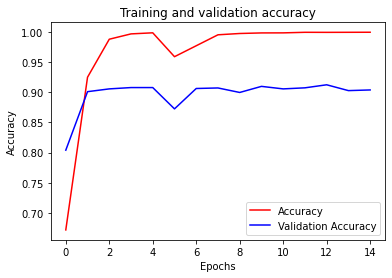

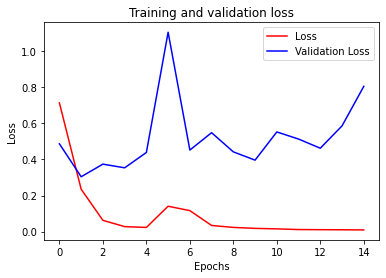

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

## Test Model Predictions

In [53]:
seed_text = test.headings.tolist()

#Use the tokenizer created with train data to convert the test data to sequences
token_list = tokenizer.texts_to_sequences(seed_text)
#Padding for the sequences to be of equal length, the parameters should match whatever was done during training
token_list = pad_sequences(token_list, maxlen=max_sequence_len, padding='post')

predicted = model.predict(token_list, verbose=0)

In [54]:
print(test.shape)
print(predicted.shape)

(3801, 2)
(3801, 3)


In [ ]:
#We inverse transform the target / label to its original representation
predicted = onehot_encoder.inverse_transform(predicted)

In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy = ", accuracy_score(test.label, predicted))

Accuracy =  0.0
